In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 太阳矢量轨道面夹角与阴影区时间关系

## 1. 公式

$$
\frac{t}{T} = \left\{ \begin{array}{rcl}
\frac{1}{\pi} \arcsin \left( \sqrt{\frac{r_e^2 - r_s^2\sin^2{\beta}}{r_s^2\cos^2{\beta}}} \right) & for & 1 \\ 
1 & for & 1
\end{array}  \right. \\
$$



$t$：阴影区时间

$T$：轨道周期

$r_e$：地球半径

$r_s$：轨道半径

$\beta$：太阳矢量与轨道面夹角

## 2. 图

轨道周期6500s，轨道高度1175km时，曲线如下：

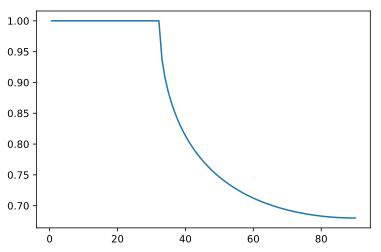

In [7]:
deg2rad = np.pi/180;
rad2deg = 180/np.pi;

# 阳照区比例
# beta: 太阳矢量与帆板法线夹角
# rs: 卫星轨道半径（只适用于圆轨道）
def sun_percent(beta, rs):
    re = 6378e3              # 地球赤道半径
    a = ((re/rs)**2 -1) / np.sin(beta)**2 + 1;
    if a < 0 or a > 1:
        x = 1
    else:
        x = 1 - 1/np.pi * np.arcsin( np.sqrt(a) )
        
    return x

beta = np.linspace(0.01, np.pi/2, 100)
x = np.zeros(100)

rs = 6378e3 + 1175e3
for i in range(len(beta)):
    x[i] = sun_percent(beta[i], rs);

plt.plot(beta*rad2deg, x)
plt.show()